# Programming Assignment 1

## Importing the necessary frameworks

In [11]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, transpile
from qiskit.quantum_info import Statevector
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram, plot_state_qsphere
from qiskit_ibm_runtime import QiskitRuntimeService, Session, SamplerV2
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
import numpy as np
import matplotlib.pyplot as plt
import seaborn
from itertools import product
from collections import Counter




## Task 1

(Half Adder) Implement the Half Adder (HA) circuit that takes two bits
(e.g. a and b) using IBM Q. Take a screenshot of the circuit for each
possible input combination, i.e., a=0 b=0, a=0 b=1, a=1 b=0, and a=1
b=1.

Input = a=0 , b=0

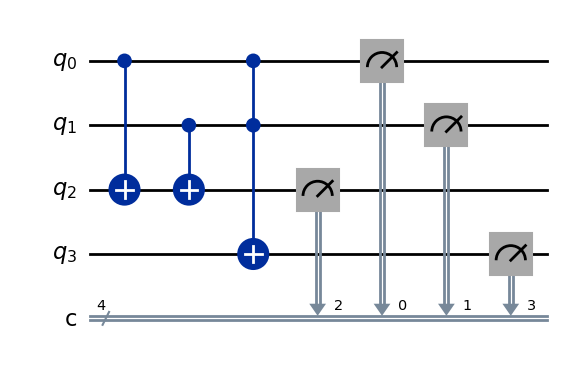

In [12]:
# Intialization of Register q dor qubits , c for classical (for measured)

qreg_q = QuantumRegister(4, 'q')
creg_c = ClassicalRegister(4, 'c')

# Creating the circuit (HA)
circuit = QuantumCircuit(qreg_q, creg_c)
circuit.cx(qreg_q[0], qreg_q[2])
circuit.cx(qreg_q[1], qreg_q[2])
circuit.ccx(qreg_q[0], qreg_q[1], qreg_q[3])

# Measure for output 
circuit.measure(qreg_q, creg_c)
circuit.draw("mpl")



Simulating for output

In [13]:
# Initialize the Simulator

simulator = Aer.get_backend("aer_simulator")

compiled = transpile(circuit, simulator)

result = simulator.run(compiled, shots=1024).result()
counts = result.get_counts()
counts

{'0000': 1024}

the order in the count is like this q3q2q1q0

q0 representing a = 0

q1 representing b = 0 

q2 representing s = 0 => SUM

q3 representing c = 0 => Carry

For Input:  a=0 , b=1

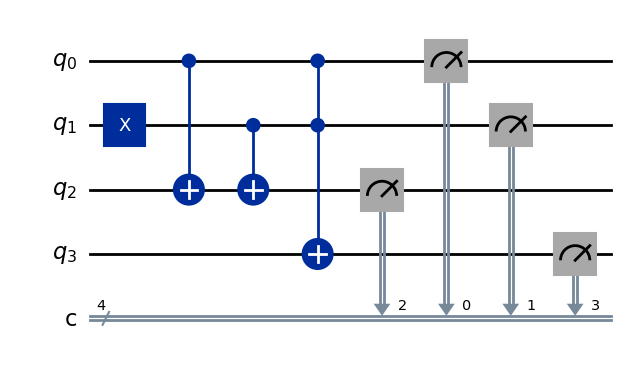

In [14]:
qreg_q = QuantumRegister(4, 'q')
creg_c = ClassicalRegister(4, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

circuit.x(qreg_q[1])   # b = 1

circuit.cx(qreg_q[0], qreg_q[2])
circuit.cx(qreg_q[1], qreg_q[2])
circuit.ccx(qreg_q[0], qreg_q[1], qreg_q[3])

circuit.measure(qreg_q, creg_c)

circuit.draw("mpl")


Simulating the output

In [15]:
simulator = Aer.get_backend("aer_simulator")

compiled = transpile(circuit, simulator)

result = simulator.run(compiled, shots=1024).result()
counts = result.get_counts()
counts

{'0110': 1024}

the order in the count is like this q3q2q1q0

q0 representing a = 0

q1 representing b = 1 

q2 representing s = 1 => SUM

q3 representing c = 0 => Carry

For Input: a=1 , b=0

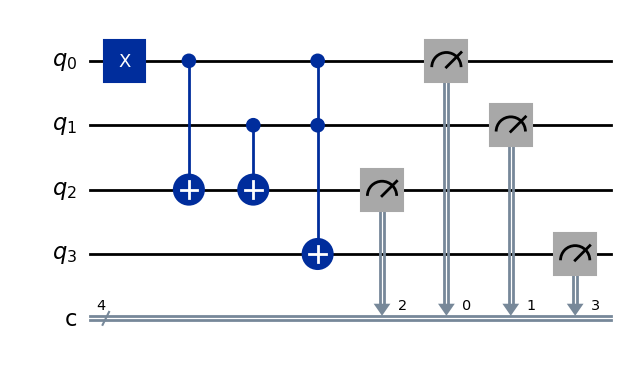

In [16]:
qreg_q = QuantumRegister(4, 'q')
creg_c = ClassicalRegister(4, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

circuit.x(qreg_q[0])   # a = 1

circuit.cx(qreg_q[0], qreg_q[2])
circuit.cx(qreg_q[1], qreg_q[2])
circuit.ccx(qreg_q[0], qreg_q[1], qreg_q[3])

circuit.measure(qreg_q, creg_c)

circuit.draw("mpl")


Simulating for output

In [17]:
simulator = Aer.get_backend("aer_simulator")

compiled = transpile(circuit, simulator)

result = simulator.run(compiled, shots=1024).result()
counts = result.get_counts()
counts

{'0101': 1024}

the order in the count is like this q3q2q1q0

q0 representing a = 1

q1 representing b = 0 

q2 representing s = 1 => SUM

q3 representing c = 0 => Carry

For Input: a=1 , b=1

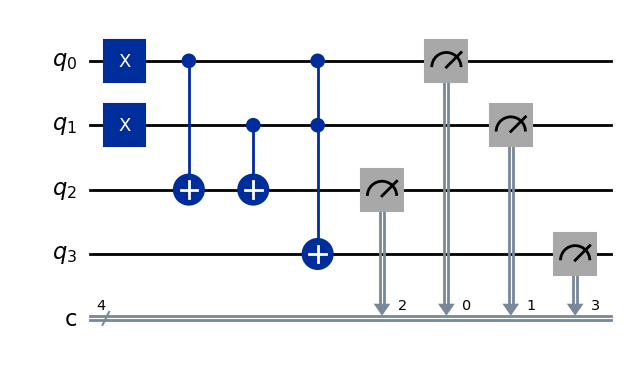

In [18]:
qreg_q = QuantumRegister(4, 'q')
creg_c = ClassicalRegister(4, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

circuit.x(qreg_q[0]) # a = 1
circuit.x(qreg_q[1]) # b = 1

circuit.cx(qreg_q[0], qreg_q[2])
circuit.cx(qreg_q[1], qreg_q[2])
circuit.ccx(qreg_q[0], qreg_q[1], qreg_q[3])

circuit.measure(qreg_q, creg_c)


circuit.draw("mpl")


Simulating for output

In [19]:
simulator = Aer.get_backend("aer_simulator")

compiled = transpile(circuit, simulator)

result = simulator.run(compiled, shots=1024).result()
counts = result.get_counts()
counts

{'1011': 1024}

the order in the count is like this q3q2q1q0

q0 representing a = 1

q1 representing b = 1 

q2 representing s = 0 => SUM

q3 representing c = 1 => Carry


## Task 2

Take a screenshot of the outputs of one of the circuits in part (1). Explain
how to interpret the output from the ”Statevector” and ”Probabilities”
figures in IBM Q.

TASK 2 WILL BE LAYED OUT PROPERLY IN THE DOCUMENTS ATTATCHED SINCE THIS IS AN .ipynb for Excuteability

## Task 3

(Full Adder) Implement the Full Adder (FA) circuit that takes, in addition
to two bits (a and b), a carry-in bit (e.g. cin ). Repeat the same procedure
in part (1) and (2).

### Circuit and comments in addition to Vizualization

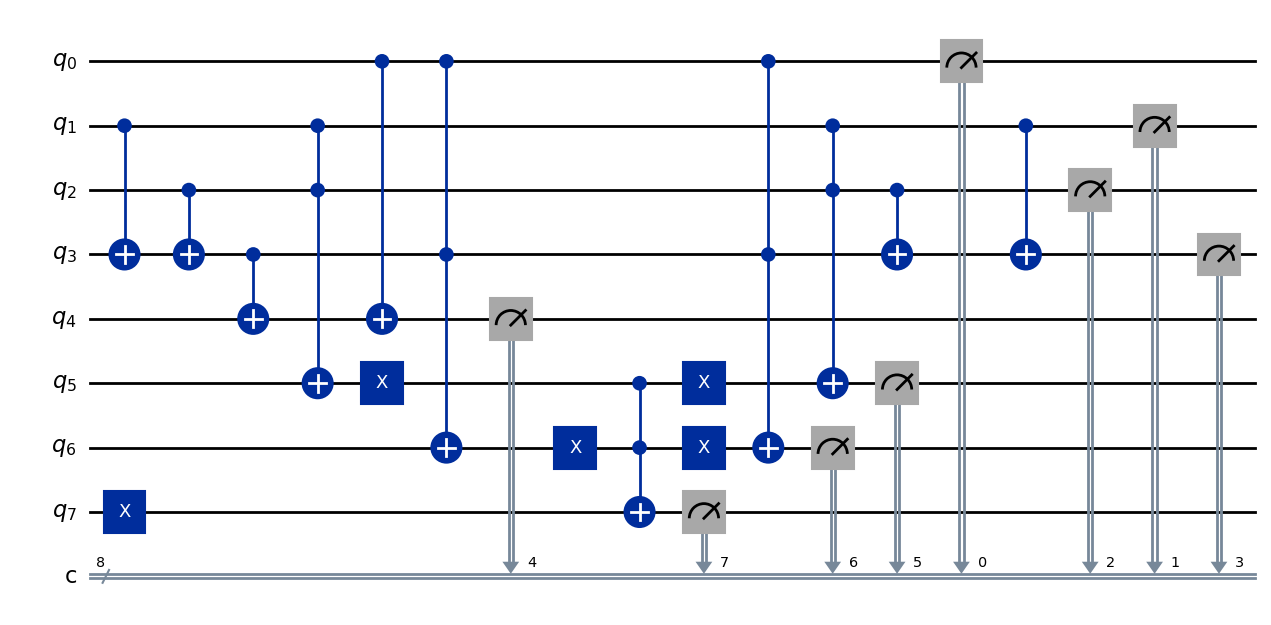

In [20]:
# Registers
qreg_q = QuantumRegister(8, 'q')
creg_c = ClassicalRegister(8, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

# -----------------------------
# Full Adder with ancillas
# q0=cin, q1=a, q2=b
# q3= (a⊕b), q4=s, q5= (ab), q6= (cin(a⊕b)), q7=cout
# -----------------------------

# a ⊕ b
circuit.cx(qreg_q[1], qreg_q[3])
circuit.cx(qreg_q[2], qreg_q[3])

# s = a ⊕ b ⊕ cin
circuit.cx(qreg_q[3], qreg_q[4])
circuit.cx(qreg_q[0], qreg_q[4])

# ab
circuit.ccx(qreg_q[1], qreg_q[2], qreg_q[5])

# cin * (a ⊕ b)
circuit.ccx(qreg_q[0], qreg_q[3], qreg_q[6])


circuit.x(qreg_q[7])        
circuit.x(qreg_q[5])        
circuit.x(qreg_q[6])        
circuit.ccx(qreg_q[5], qreg_q[6], qreg_q[7])
circuit.x(qreg_q[5])        
circuit.x(qreg_q[6])        

# Uncompute ancillas (clean back to 0) I put why i uncomputed it in the doc 
circuit.ccx(qreg_q[0], qreg_q[3], qreg_q[6])     
circuit.ccx(qreg_q[1], qreg_q[2], qreg_q[5])     
circuit.cx(qreg_q[2], qreg_q[3])                 
circuit.cx(qreg_q[1], qreg_q[3])

# Measure all
circuit.measure(qreg_q, creg_c)

circuit.draw("mpl")

#### Full Adder Circuit in a Function for reusability

Since there are 2^3 cases to try.

In [21]:
def full_adder(cin, a, b):
    
    qreg_q = QuantumRegister(8, 'q')
    creg_c = ClassicalRegister(8, 'c')
    circuit = QuantumCircuit(qreg_q, creg_c)

    # I added conditional statemtents to cover the cases
    if cin == 1:
        circuit.x(qreg_q[0])
    if a == 1:
        circuit.x(qreg_q[1])
    if b == 1:
        circuit.x(qreg_q[2])



    circuit.cx(qreg_q[1], qreg_q[3])
    circuit.cx(qreg_q[2], qreg_q[3])

    circuit.cx(qreg_q[3], qreg_q[4])
    circuit.cx(qreg_q[0], qreg_q[4])

    circuit.ccx(qreg_q[1], qreg_q[2], qreg_q[5])

    circuit.ccx(qreg_q[0], qreg_q[3], qreg_q[6])

    circuit.x(qreg_q[7])
    circuit.x(qreg_q[5])
    circuit.x(qreg_q[6])
    circuit.ccx(qreg_q[5], qreg_q[6], qreg_q[7])
    circuit.x(qreg_q[5])
    circuit.x(qreg_q[6])

    circuit.ccx(qreg_q[0], qreg_q[3], qreg_q[6])
    circuit.ccx(qreg_q[1], qreg_q[2], qreg_q[5])
    circuit.cx(qreg_q[2], qreg_q[3])
    circuit.cx(qreg_q[1], qreg_q[3])

    circuit.measure(qreg_q, creg_c)

    return circuit

#### Vizualizing All Cases


=== FA Circuit for cin=0, a=0, b=0 ===


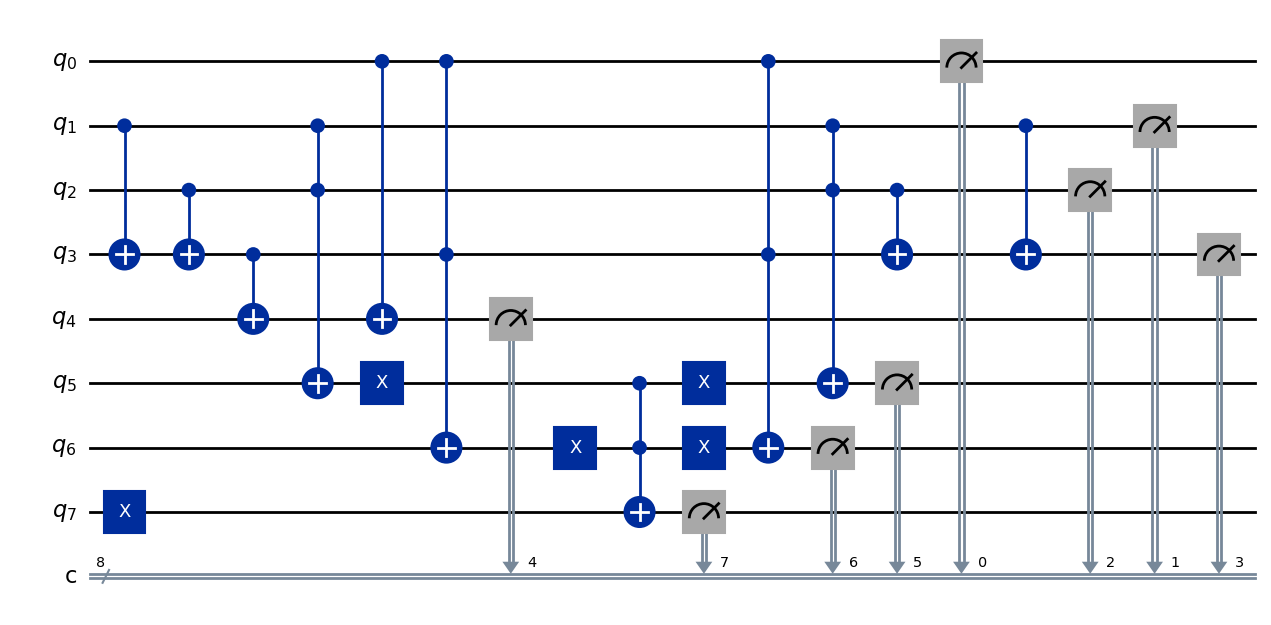


=== FA Circuit for cin=0, a=0, b=1 ===


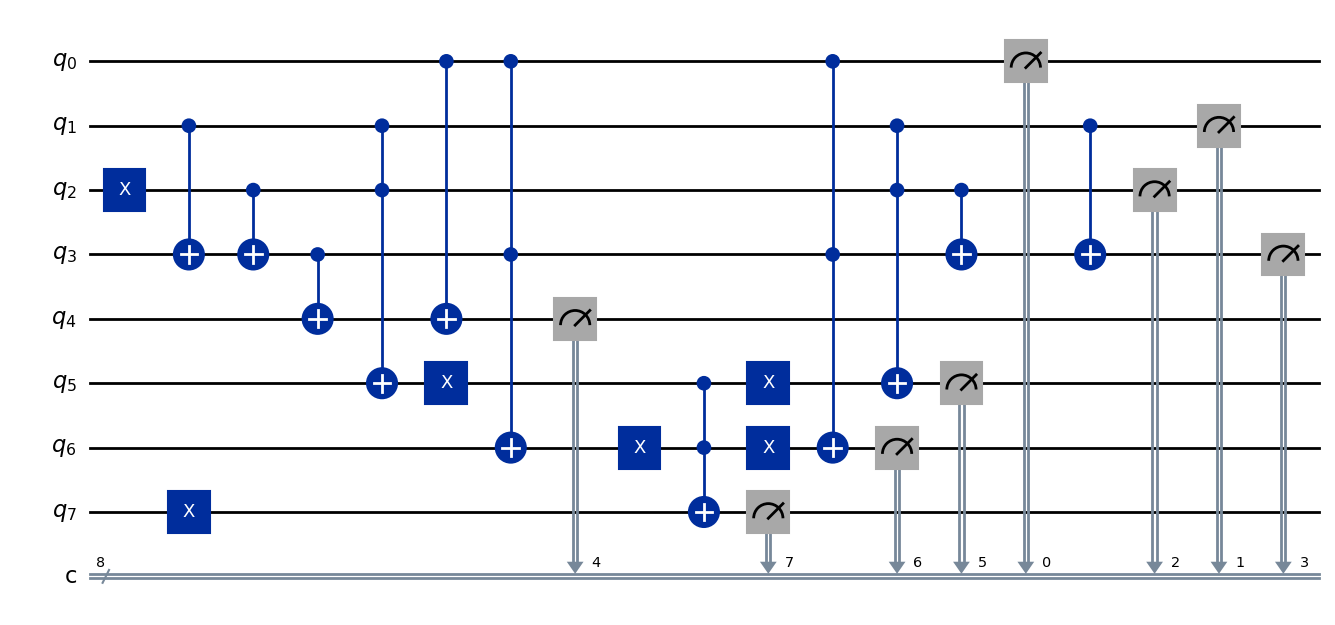


=== FA Circuit for cin=0, a=1, b=0 ===


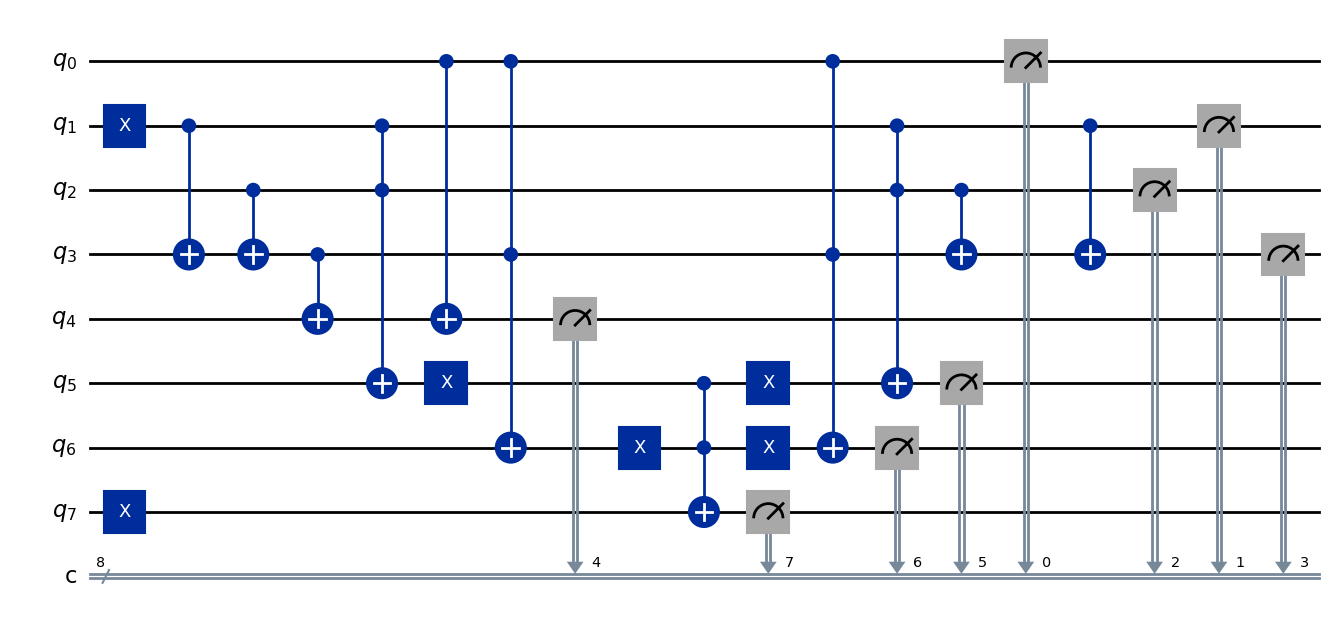


=== FA Circuit for cin=0, a=1, b=1 ===


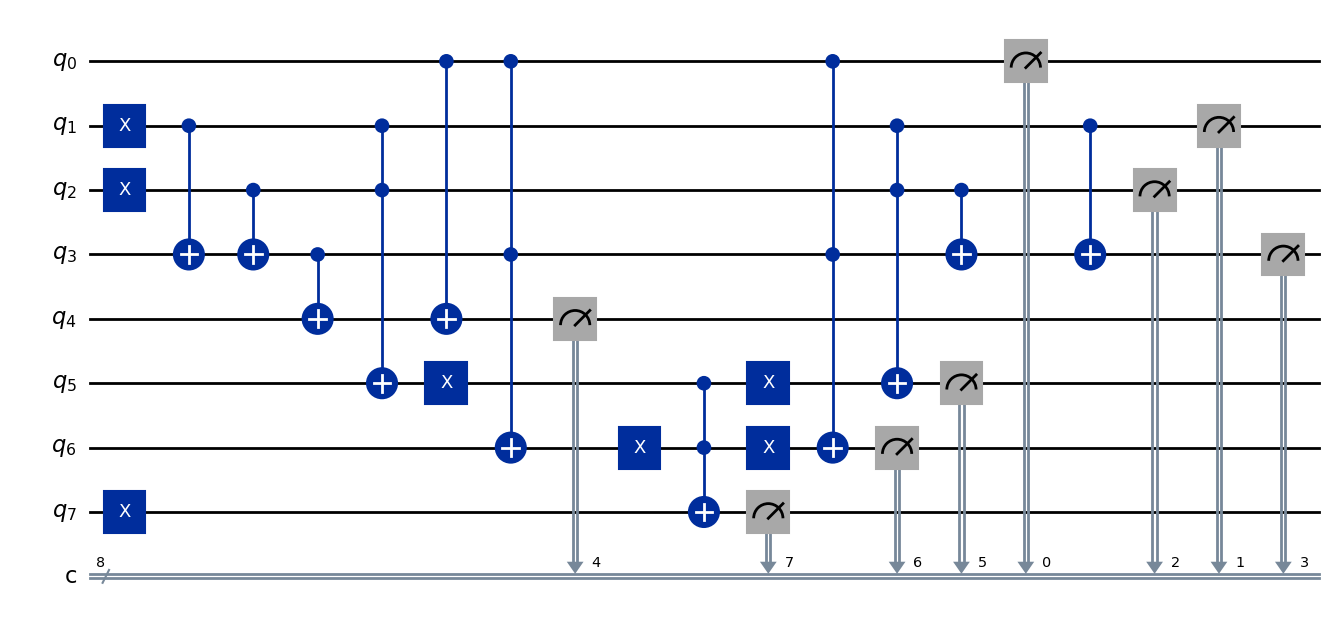


=== FA Circuit for cin=1, a=0, b=0 ===


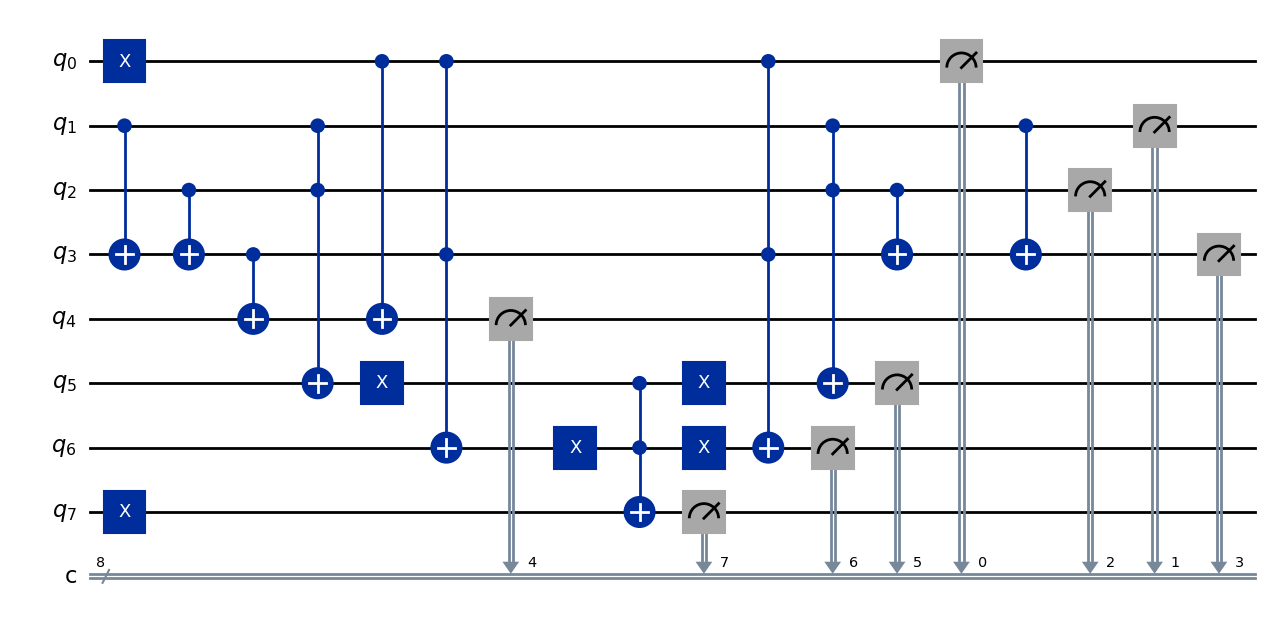


=== FA Circuit for cin=1, a=0, b=1 ===


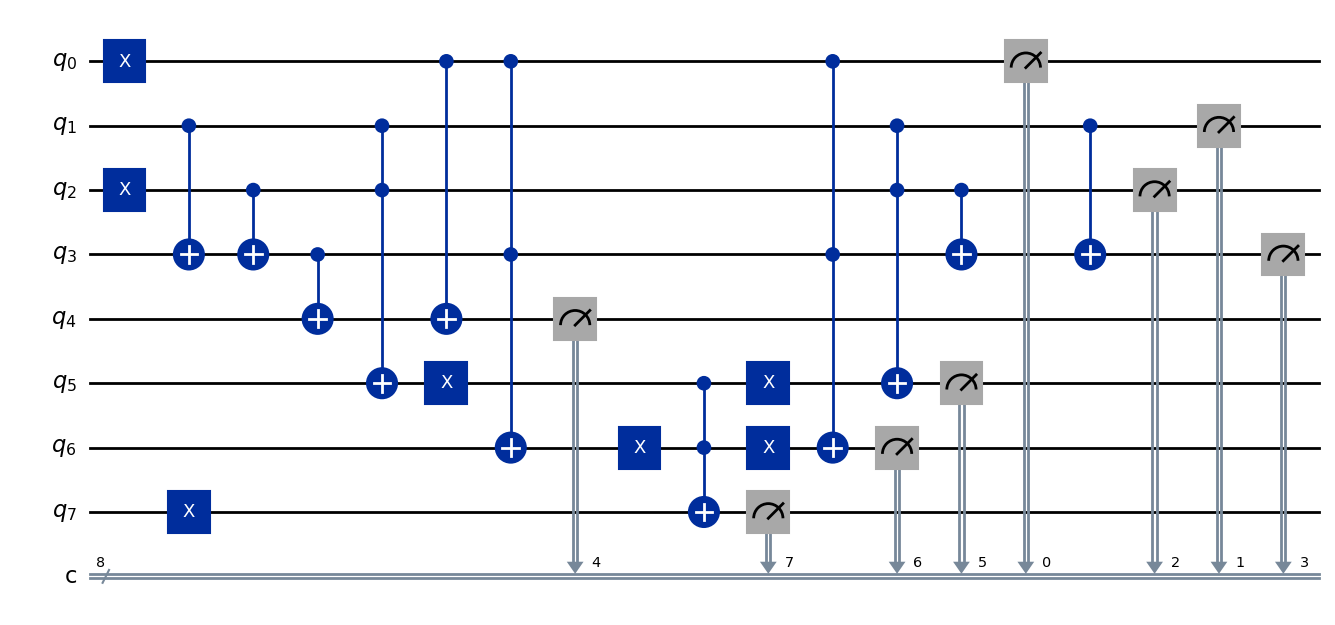


=== FA Circuit for cin=1, a=1, b=0 ===


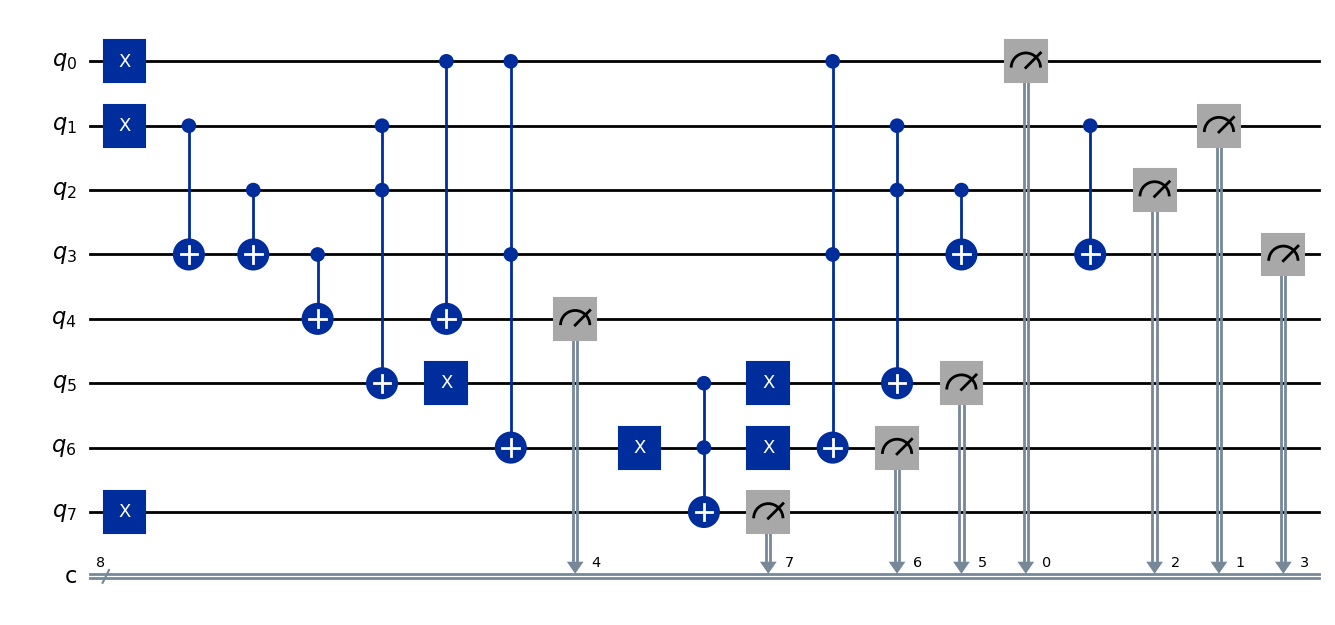


=== FA Circuit for cin=1, a=1, b=1 ===


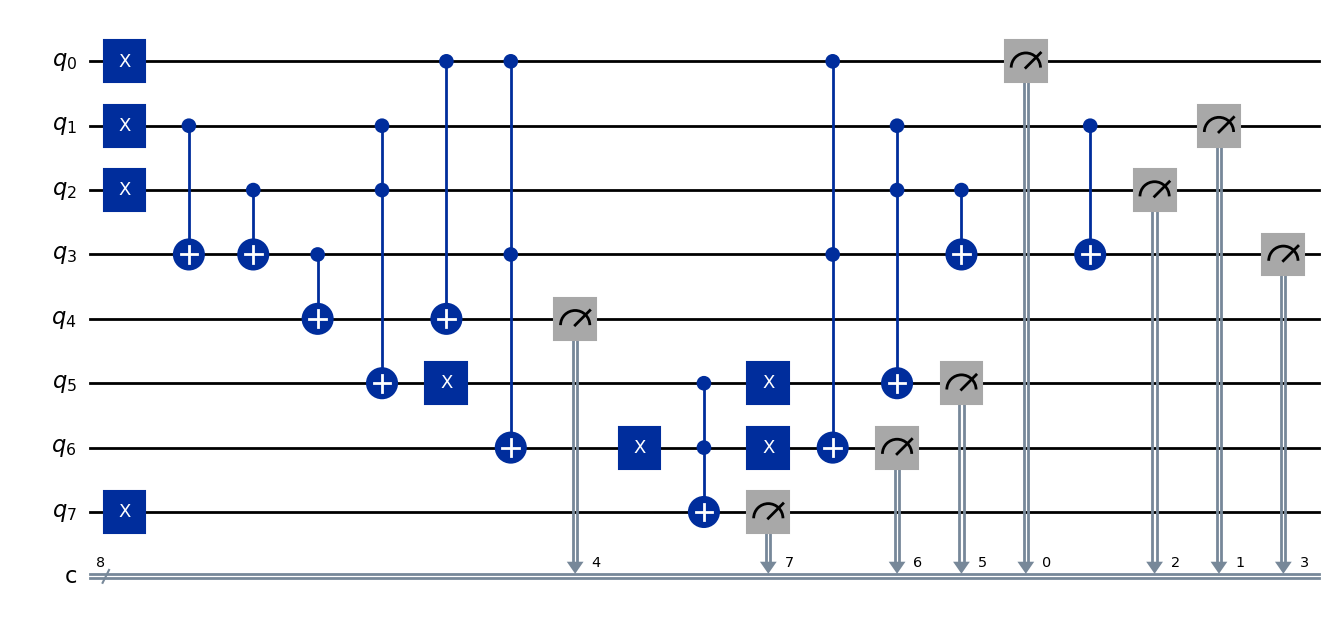

In [22]:
for cin, a, b in product([0, 1], [0, 1], [0, 1]):
    qc = full_adder(cin, a, b)
    print(f"\n=== FA Circuit for cin={cin}, a={a}, b={b} ===")
    display(qc.draw("mpl"))

### Simulationg the Full Adder 

In [23]:
simulator = Aer.get_backend("aer_simulator")

cases = [
    (0,0,0),
    (0,0,1),
    (0,1,0),
    (0,1,1),
    (1,0,0),
    (1,0,1),
    (1,1,0),
    (1,1,1)
]

for cin, a, b in cases:
    
    circuit = full_adder(cin, a, b)
    
    compiled = transpile(circuit, simulator)
    result = simulator.run(compiled, shots=1024).result()
    counts = result.get_counts()
    
    print(f"cin={cin}, a={a}, b={b} -> {counts}")

cin=0, a=0, b=0 -> {'00000000': 1024}
cin=0, a=0, b=1 -> {'00010100': 1024}
cin=0, a=1, b=0 -> {'00010010': 1024}
cin=0, a=1, b=1 -> {'10000110': 1024}
cin=1, a=0, b=0 -> {'00010001': 1024}
cin=1, a=0, b=1 -> {'10000101': 1024}
cin=1, a=1, b=0 -> {'10000011': 1024}
cin=1, a=1, b=1 -> {'10010111': 1024}


```
the order in the count is like this q7q6q5q4q3q2q1q0

q0 representing cin
q1 representing a
q2 representing b
q3 representing (a ⊕ b)  -> ancilla
q4 representing s  => SUM
q5 representing (ab)      -> ancilla
q6 representing (cin(a ⊕ b)) -> ancilla
q7 representing c  => Carry (Cout)
```

#### Full Adder Result Interpretation 

##### Case 1
**For cin = 0,
a = 0,
b = 0**

``` 

output bitstring = 00000000

q0 = 0  => cin
q1 = 0  => a
q2 = 0  => b
q3 = 0  => ancilla
q4 = 0  => SUM
q5 = 0  => ancilla
q6 = 0  => ancilla
q7 = 0  => Carry
```

##### Case 2
**For cin = 0,
a = 0,
b = 1**

```
output bitstring = 00010100

q0 = 0  => cin
q1 = 0  => a
q2 = 1  => b
q3 = 0  => ancilla
q4 = 1  => SUM
q5 = 0  => ancilla
q6 = 0  => ancilla
q7 = 0  => Carry
```

##### Case 3
**For cin = 0,
a = 1,
b = 0**

```
output bitstring = 00010010

q0 = 0  => cin
q1 = 1  => a
q2 = 0  => b
q3 = 0  => ancilla
q4 = 1  => SUM
q5 = 0  => ancilla
q6 = 0  => ancilla
q7 = 0  => Carry
```

##### Case 4
**For cin = 0,
a = 1,
b = 1**

```

output bitstring = 10000110

q0 = 0  => cin
q1 = 1  => a
q2 = 1  => b
q3 = 0  => ancilla
q4 = 0  => SUM
q5 = 0  => ancilla
q6 = 0  => ancilla
q7 = 1  => Carry
```

##### Case 5
**For cin = 1,
a = 0,
b = 0**

```

output bitstring = 00010001

q0 = 1  => cin
q1 = 0  => a
q2 = 0  => b
q3 = 0  => ancilla
q4 = 1  => SUM
q5 = 0  => ancilla
q6 = 0  => ancilla
q7 = 0  => Carry
```

##### Case 6
**For cin = 1,
a = 0,
b = 1**

```

output bitstring = 10000101

q0 = 1  => cin
q1 = 0  => a
q2 = 1  => b
q3 = 0  => ancilla
q4 = 0  => SUM
q5 = 0  => ancilla
q6 = 0  => ancilla
q7 = 1  => Carry
```

##### Case 7
**For cin = 1,
a = 1,
b = 0**

```
output bitstring = 10000011

q0 = 1  => cin
q1 = 1  => a
q2 = 0  => b
q3 = 0  => ancilla
q4 = 0  => SUM
q5 = 0  => ancilla
q6 = 0  => ancilla
q7 = 1  => Carry
```

##### Case 8
**For cin = 1,
a = 1,
b = 1**

```
output bitstring = 10010111

q0 = 1  => cin
q1 = 1  => a
q2 = 1  => b
q3 = 0  => ancilla
q4 = 1  => SUM
q5 = 0  => ancilla
q6 = 0  => ancilla
q7 = 1  => Carry
```

#### Full Adder Case 8 Statevector and Probabilities 

**For cin = 1,
a = 1,
b = 1**

Note:

Since I'm using 8 Qbits I couldn't visualize it using IBM Composer so, I decided to use Matplotlib instead and I'm still on Task 3 where Task 5,6 is where the Quantum Hardware application for more than 6 qbits discussed 

In [24]:
q = QuantumRegister(8, 'q')
qc = QuantumCircuit(q)

# Case 8: cin=1, a=1, b=1
qc.x(q[0])  # cin
qc.x(q[1])  # a
qc.x(q[2])  # b


qc.cx(q[1], q[3])
qc.cx(q[2], q[3])

qc.cx(q[3], q[4])
qc.cx(q[0], q[4])

qc.ccx(q[1], q[2], q[5])

qc.ccx(q[0], q[3], q[6])

qc.x(q[7])
qc.x(q[5])
qc.x(q[6])
qc.ccx(q[5], q[6], q[7])
qc.x(q[5])
qc.x(q[6])

qc.ccx(q[0], q[3], q[6])
qc.ccx(q[1], q[2], q[5])
qc.cx(q[2], q[3])
qc.cx(q[1], q[3])

# statevector
sv = Statevector.from_instruction(qc)

In [25]:
amps = sv.data
n = qc.num_qubits

labels = []
magnitudes = []
probabilities = []

for i, amp in enumerate(amps):
    if abs(amp) > 1e-9:
        bitstr = format(i, f"0{n}b")
        labels.append(bitstr)
        magnitudes.append(abs(amp))
        probabilities.append(abs(amp)**2)

print("Non-zero basis state:", labels[0])
print("Amplitude:", magnitudes[0])
print("Probability:", probabilities[0])

Non-zero basis state: 10010111
Amplitude: 1.0
Probability: 1.0


***Statevector***

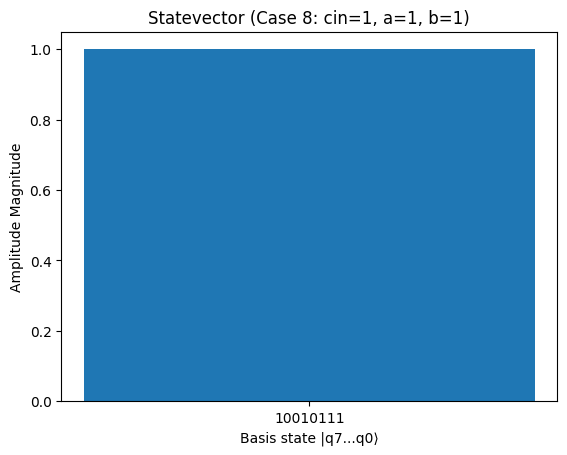

In [26]:
plt.figure()
plt.bar(labels, magnitudes)
plt.xlabel("Basis state |q7...q0⟩")
plt.ylabel("Amplitude Magnitude")
plt.title("Statevector (Case 8: cin=1, a=1, b=1)")
plt.show()

***Probabilities***

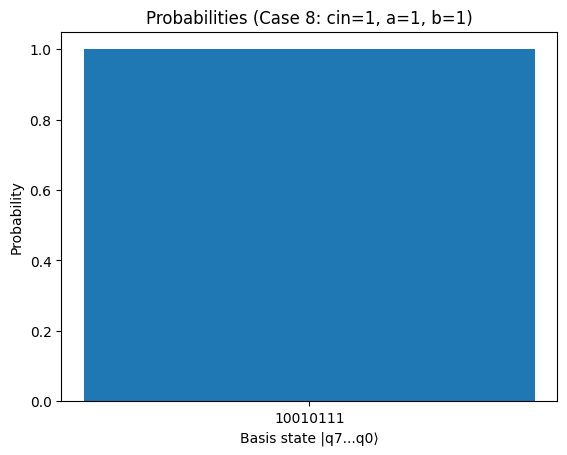

In [27]:
plt.figure()
plt.bar(labels, probabilities)
plt.xlabel("Basis state |q7...q0⟩")
plt.ylabel("Probability")
plt.title("Probabilities (Case 8: cin=1, a=1, b=1)")
plt.show()

The Amplitude and The Probabilities |Amp|^2 corrospond to a single state which is the expected addition of A, B, Cin.

## Task 4

Now, instead of assigning a particular value for a (i.e., 0 or 1), put the
qubit that represents bit a in a superposition state and observe the output
state. Explain how to interpret the output from the ”Statevector” and
”Probabilities” figures in IBM Q in this case.

### Full Adder circuit with superposition on a, adding hadamard gate only on a wire

To put a in superposition we just need to repeat the steps in task 3 only adding a hadamard gate on a wire


=== FA (a in superposition) for cin=0, b=0 ===


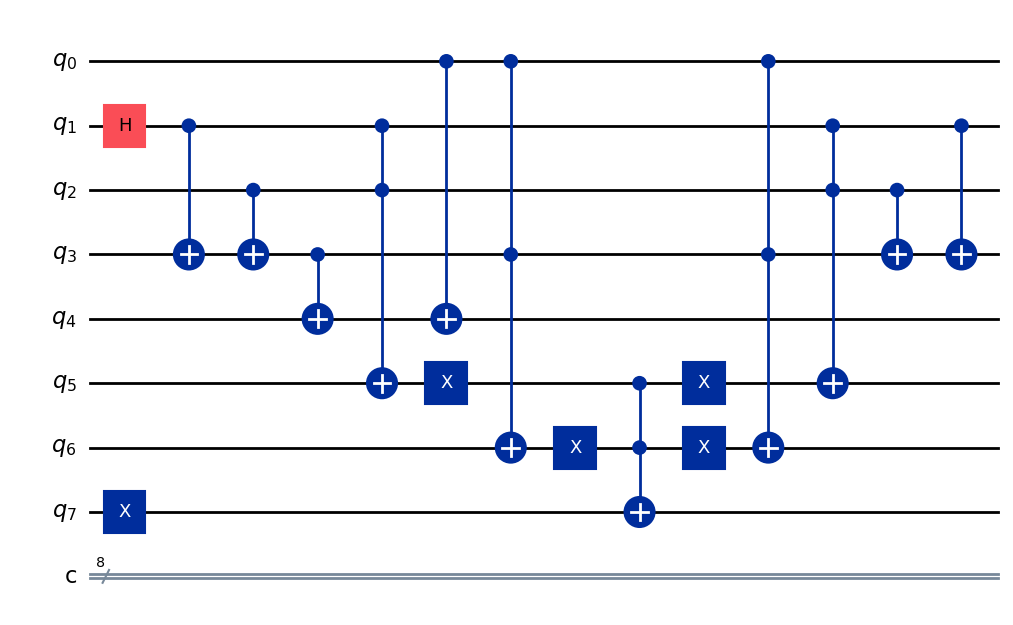


=== FA (a in superposition) for cin=0, b=1 ===


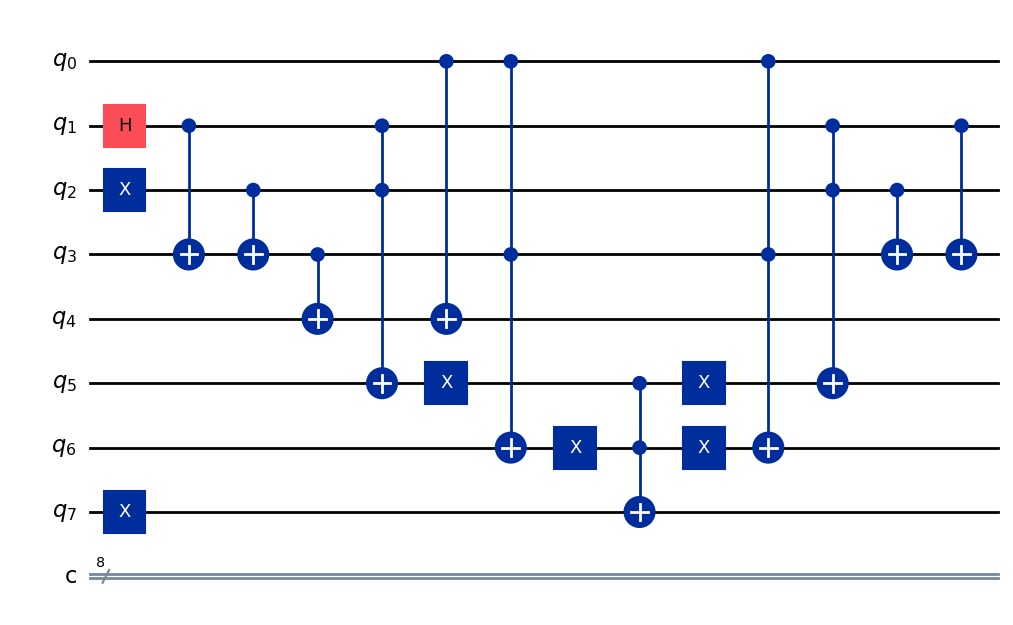


=== FA (a in superposition) for cin=1, b=0 ===


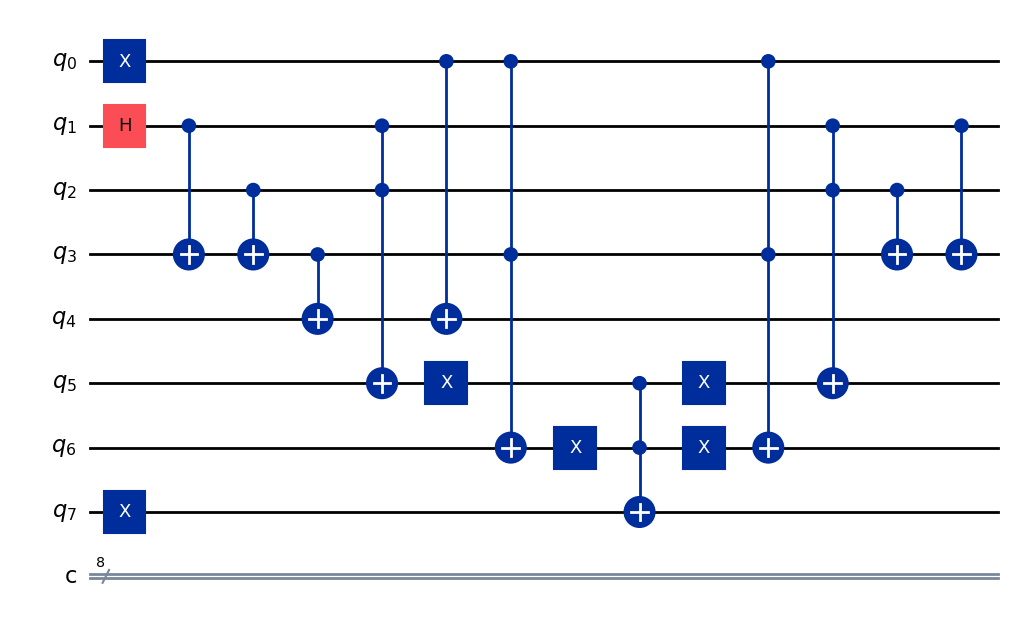


=== FA (a in superposition) for cin=1, b=1 ===


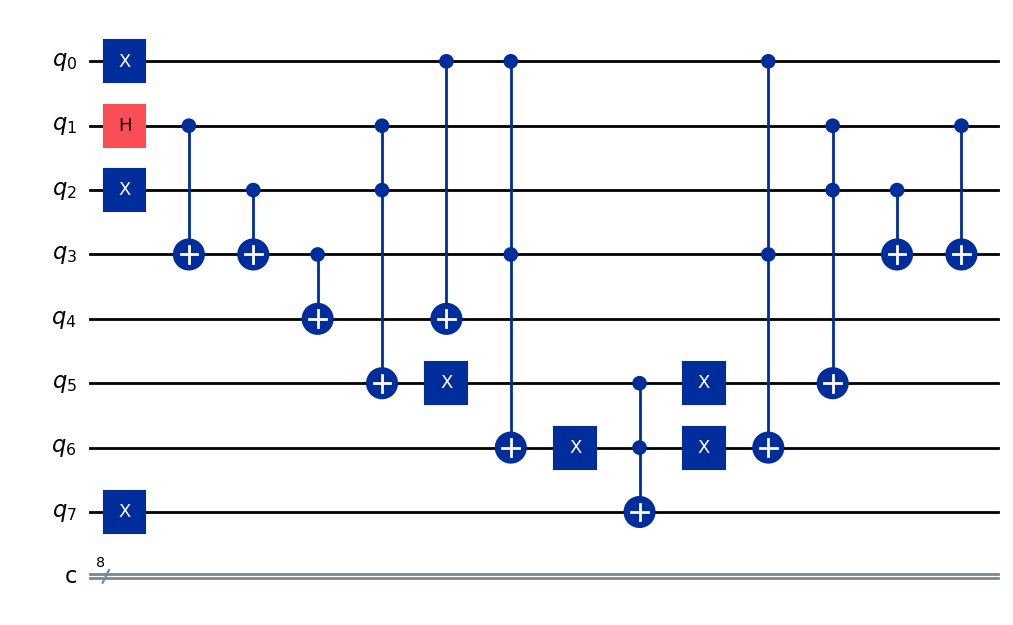

In [ ]:
def full_adder_superposition(cin, b):
    qreg_q = QuantumRegister(8, 'q')
    creg_c = ClassicalRegister(8, 'c')
    circuit = QuantumCircuit(qreg_q, creg_c)

    if cin == 1:
        circuit.x(qreg_q[0])
    if b == 1:
        circuit.x(qreg_q[2])

    circuit.h(qreg_q[1])  # superposition on a hadamard

    circuit.cx(qreg_q[1], qreg_q[3])
    circuit.cx(qreg_q[2], qreg_q[3])

    circuit.cx(qreg_q[3], qreg_q[4])
    circuit.cx(qreg_q[0], qreg_q[4])

    circuit.ccx(qreg_q[1], qreg_q[2], qreg_q[5])
    circuit.ccx(qreg_q[0], qreg_q[3], qreg_q[6])

    circuit.x(qreg_q[7])
    circuit.x(qreg_q[5])
    circuit.x(qreg_q[6])
    circuit.ccx(qreg_q[5], qreg_q[6], qreg_q[7])
    circuit.x(qreg_q[5])
    circuit.x(qreg_q[6])

    circuit.ccx(qreg_q[0], qreg_q[3], qreg_q[6])
    circuit.ccx(qreg_q[1], qreg_q[2], qreg_q[5])
    circuit.cx(qreg_q[2], qreg_q[3])
    circuit.cx(qreg_q[1], qreg_q[3])

    return circuit


for cin, b in product([0, 1], [0, 1]):
    qc = full_adder_superposition(cin, b)
    print(f"\n=== FA (a in superposition) for cin={cin}, b={b} ===")
    display(qc.draw("mpl"))

### Visualization (Probabilities, StateVector, Qsphere)

I added QSphere to better interpret the results to see the vector


=== cin=0, b=0 (a in superposition) ===
Non-zero basis states:
|00000000⟩   |amp|=0.707107   P=0.500000
|00010010⟩   |amp|=0.707107   P=0.500000


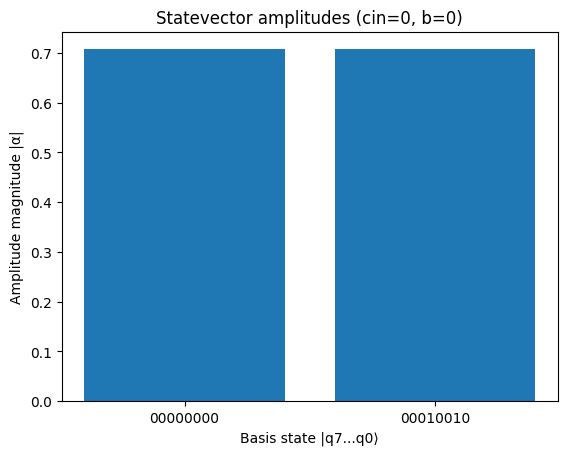

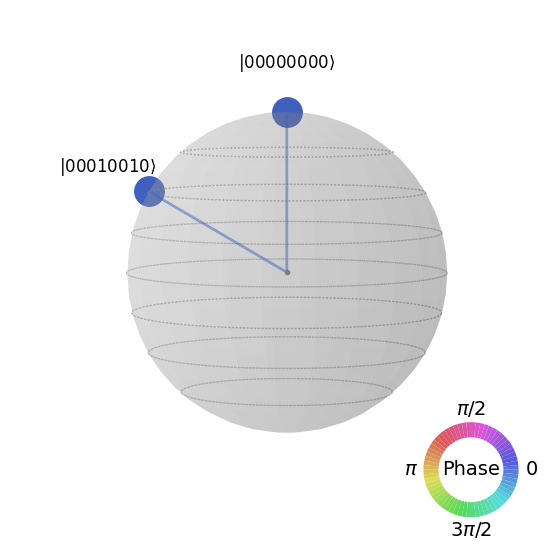

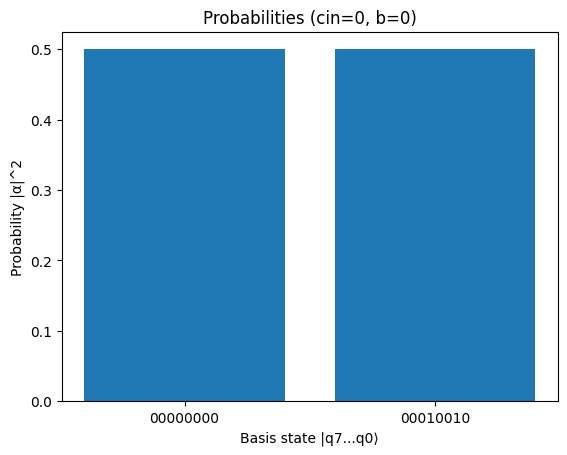


=== cin=0, b=1 (a in superposition) ===
Non-zero basis states:
|00010100⟩   |amp|=0.707107   P=0.500000
|10000110⟩   |amp|=0.707107   P=0.500000


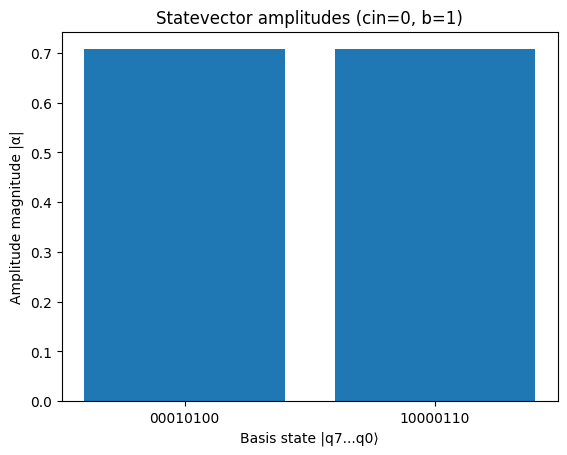

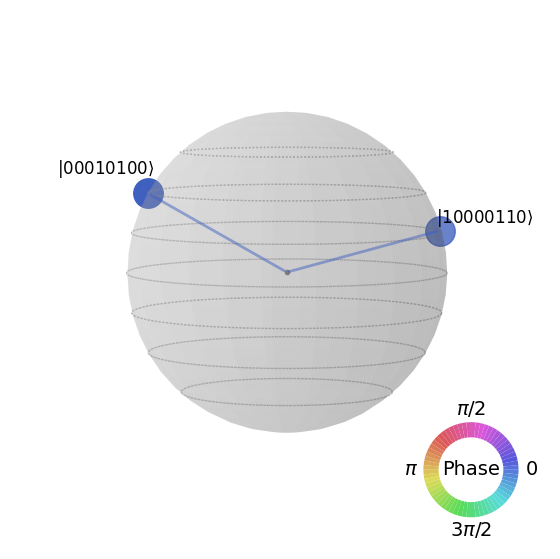

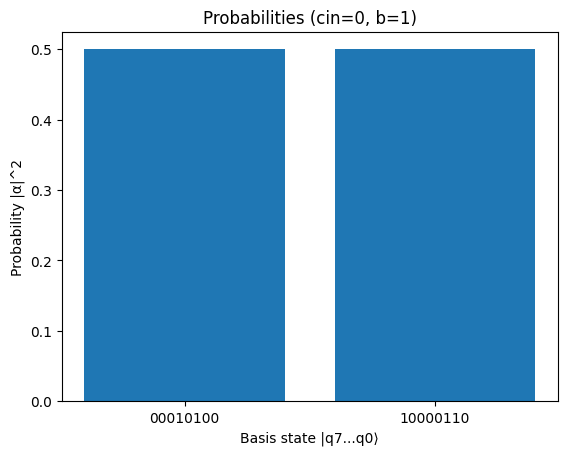


=== cin=1, b=0 (a in superposition) ===
Non-zero basis states:
|00010001⟩   |amp|=0.707107   P=0.500000
|10000011⟩   |amp|=0.707107   P=0.500000


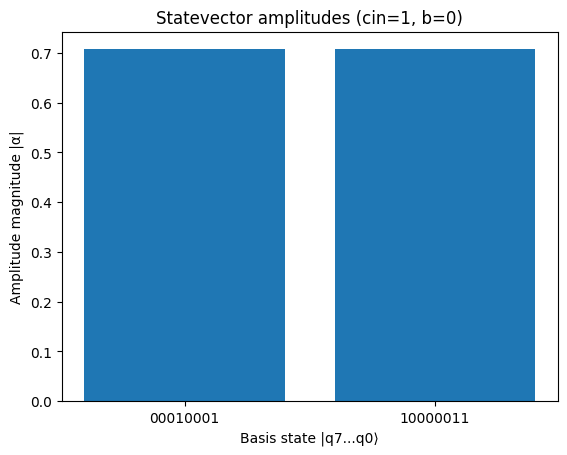

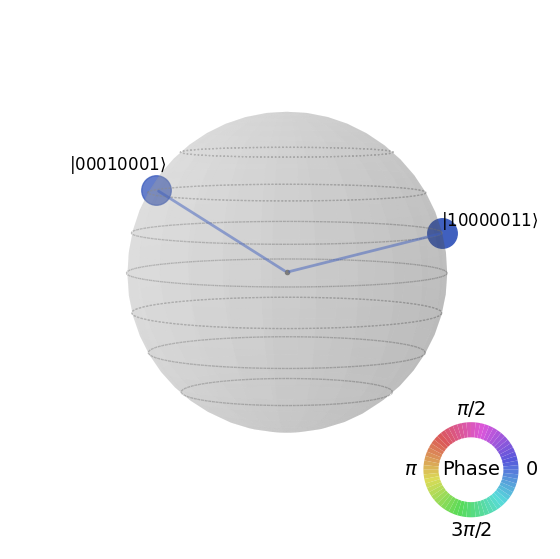

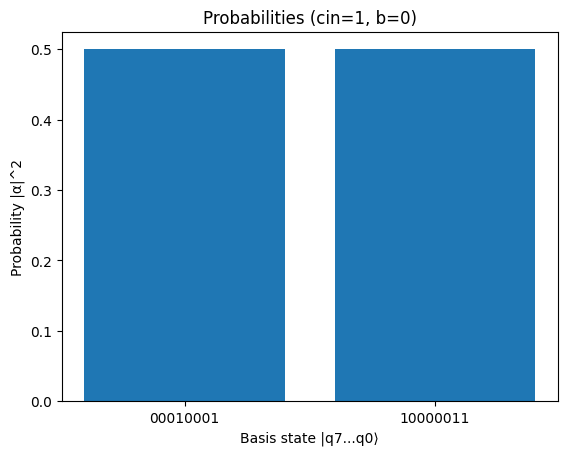


=== cin=1, b=1 (a in superposition) ===
Non-zero basis states:
|10000101⟩   |amp|=0.707107   P=0.500000
|10010111⟩   |amp|=0.707107   P=0.500000


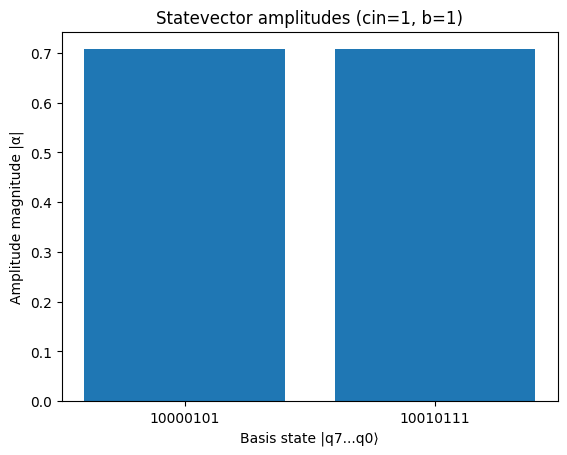

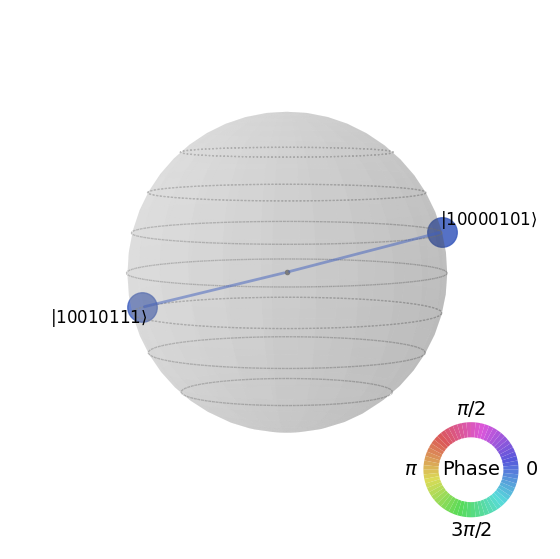

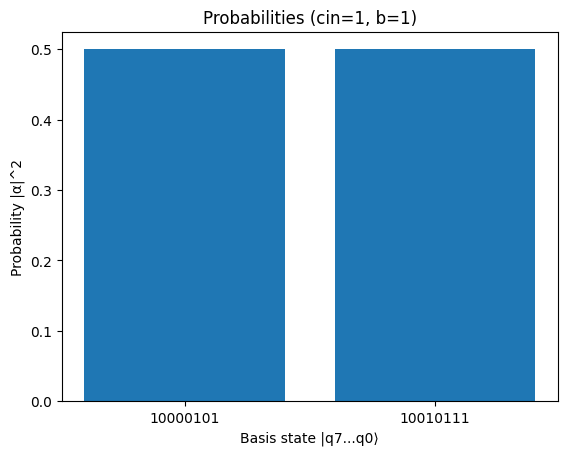

In [ ]:
for cin, b in product([0, 1], [0, 1]):
    qc = full_adder_superposition(cin, b)
    sv = Statevector.from_instruction(qc)

    amps = sv.data
    n = qc.num_qubits

    labels = []
    amp_mag = []
    probs = []

    for i, amp in enumerate(amps):
        if abs(amp) > 1e-9:
            bitstr = format(i, f"0{n}b")
            labels.append(bitstr)
            amp_mag.append(abs(amp))
            probs.append(abs(amp)**2)

    print(f"\n=== cin={cin}, b={b} (a in superposition) ===")
    print("Non-zero basis states:")
    for s, a_mag, p in zip(labels, amp_mag, probs):
        print(f"|{s}⟩   |amp|={a_mag:.6f}   P={p:.6f}")

    plt.figure()
    plt.bar(labels, amp_mag)
    plt.xlabel("Basis state |q7...q0⟩")
    plt.ylabel("Amplitude magnitude |α|")
    plt.title(f"Statevector amplitudes (cin={cin}, b={b})")
    plt.show()

    fig_q = plot_state_qsphere(sv)
    display(fig_q)

    plt.figure()
    plt.bar(labels, probs)
    plt.xlabel("Basis state |q7...q0⟩")
    plt.ylabel("Probability |α|^2")
    plt.title(f"Probabilities (cin={cin}, b={b})")
    plt.show()

## Task 5

Run the FA circuit on any available quantum hardware and take a screen-
shot of the job’s output.


I used IBM Quantum Platform

### Drawing the Circuit using a in a superposition and Cin=1, B=1

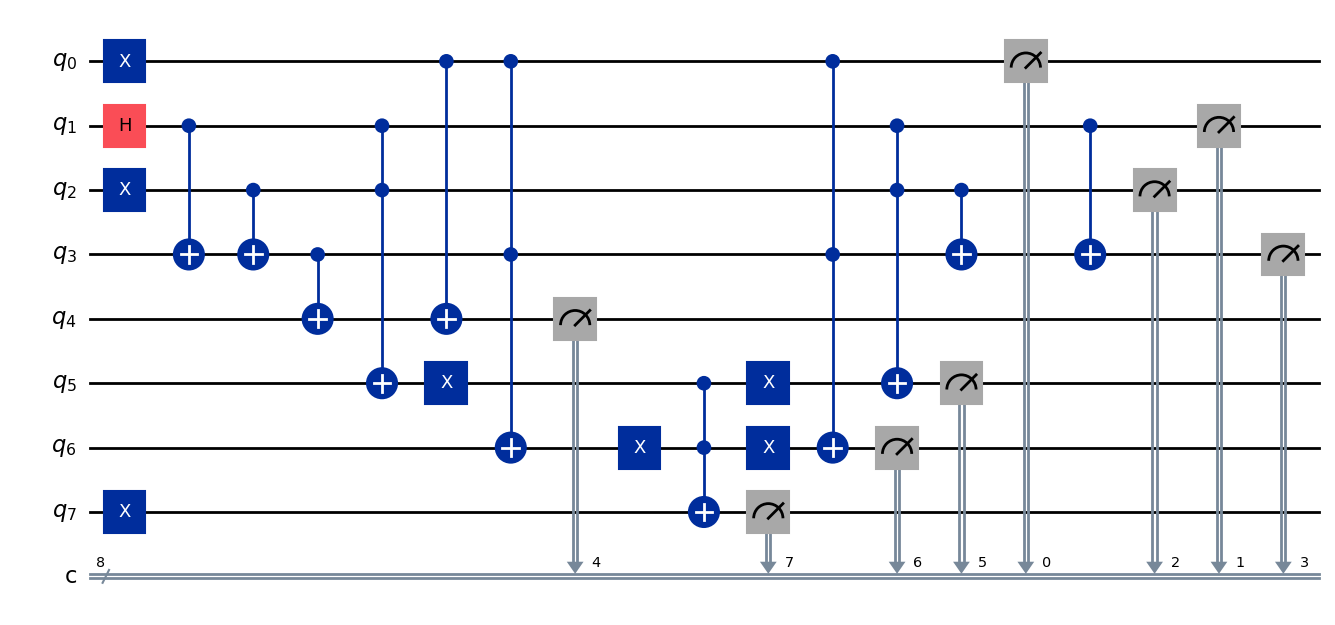

In [ ]:
def full_adder_superposition(cin, b):
    qreg_q = QuantumRegister(8, 'q')
    circuit = QuantumCircuit(qreg_q)

    if cin == 1:
        circuit.x(qreg_q[0])
    if b == 1:
        circuit.x(qreg_q[2])

    circuit.h(qreg_q[1])  # superposition on a hadamard

    circuit.cx(qreg_q[1], qreg_q[3])
    circuit.cx(qreg_q[2], qreg_q[3])

    circuit.cx(qreg_q[3], qreg_q[4])
    circuit.cx(qreg_q[0], qreg_q[4])

    circuit.ccx(qreg_q[1], qreg_q[2], qreg_q[5])
    circuit.ccx(qreg_q[0], qreg_q[3], qreg_q[6])

    circuit.x(qreg_q[7])
    circuit.x(qreg_q[5])
    circuit.x(qreg_q[6])
    circuit.ccx(qreg_q[5], qreg_q[6], qreg_q[7])
    circuit.x(qreg_q[5])
    circuit.x(qreg_q[6])

    circuit.ccx(qreg_q[0], qreg_q[3], qreg_q[6])
    circuit.ccx(qreg_q[1], qreg_q[2], qreg_q[5])
    circuit.cx(qreg_q[2], qreg_q[3])
    circuit.cx(qreg_q[1], qreg_q[3])

    return circuit

cin, b = 1, 1
qc = full_adder_superposition(cin, b)

meas = QuantumCircuit(qc.num_qubits, qc.num_qubits)
meas.compose(qc, inplace=True)
meas.measure(range(qc.num_qubits), range(qc.num_qubits))

display(meas.draw("mpl"))

### Connecting usinng IBM Qiskit Run Time Serive (QPU) using API KEY and running the circuit 

In [ ]:
# QiskitRuntimeService.save_account(
# token="<your-api-key>"
# )

service = QiskitRuntimeService(channel="ibm_quantum_platform")
backend = service.least_busy(simulator=False, operational=True)
print("Using backend:", backend.name)

pm = generate_preset_pass_manager(
    optimization_level=1,
    backend=backend,
    translation_method="translator"
)

tqc = pm.run(meas)  

sampler = SamplerV2(backend)
job = sampler.run([tqc], shots=1024)

print("Job ID:", job.job_id())

result = job.result()
counts = result[0].data.c.get_counts()
print("Counts:", counts)

qiskit_runtime_service.__init__:WARNING:2026-02-28 19:29:05,920: Instance was not set at service instantiation. Free and trial plan instances will be prioritized. Based on the following filters: (tags: None, region: us-east, eu-de), and available plans: (open), the available account instances are: open-instance. If you need a specific instance set it explicitly either by using a saved account with a saved default instance or passing it in directly to QiskitRuntimeService().
qiskit_runtime_service.backends:WARNING:2026-02-28 19:29:07,560: Loading instance: open-instance, plan: open
qiskit_runtime_service.backends:WARNING:2026-02-28 19:29:11,304: Using instance: open-instance, plan: open


Using backend: ibm_torino
Job ID: d6hhfme48nic73an29m0
Counts: {'11001101': 14, '11100110': 1, '00111011': 4, '10010111': 170, '10010001': 5, '10001101': 15, '11010111': 10, '00010101': 9, '10011110': 4, '10000101': 257, '10000100': 6, '00000101': 20, '00011100': 3, '10100101': 33, '10111100': 2, '10001001': 13, '00000100': 7, '11010100': 2, '00010111': 17, '11101001': 1, '10011100': 3, '11100001': 3, '10001111': 22, '10011111': 16, '10010110': 16, '00011011': 11, '11001110': 3, '01100101': 2, '00010011': 2, '11000101': 8, '10000111': 17, '10011001': 1, '10111011': 11, '01000101': 4, '11101101': 2, '11011111': 6, '10000011': 4, '01111101': 1, '10010101': 11, '10011101': 26, '10000001': 11, '00001111': 6, '11000100': 15, '00011101': 22, '10001100': 4, '11010101': 1, '00000111': 4, '01001111': 3, '00010001': 6, '10110111': 6, '11100101': 5, '10100001': 3, '10000110': 8, '10101111': 6, '10100100': 2, '11101100': 1, '00100101': 2, '11011100': 1, '10110001': 4, '01000100': 1, '11000111': 4,

### Visualization 

the most common 15 since 1024 shots will create alot of outputs 

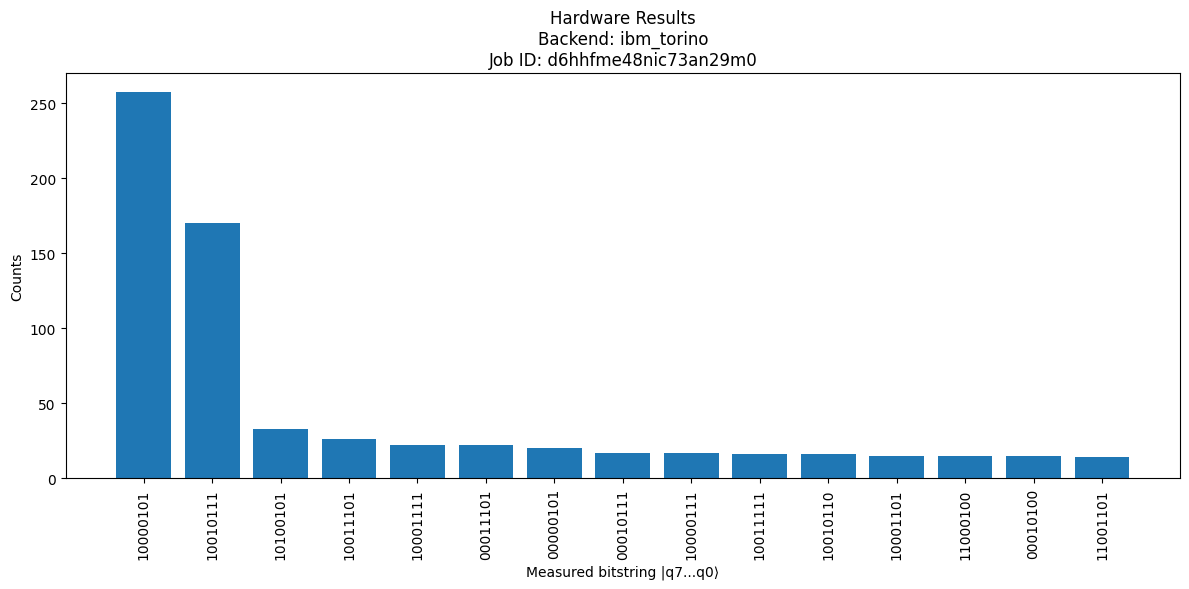

In [ ]:
sorted_counts = dict(Counter(counts).most_common(15)) 

labels = list(sorted_counts.keys())
values = list(sorted_counts.values())

plt.figure(figsize=(12,6))
plt.bar(labels, values)

plt.xticks(rotation=90)
plt.xlabel("Measured bitstring |q7...q0⟩")
plt.ylabel("Counts")
plt.title(f"Hardware Results\nBackend: {backend.name}\nJob ID: {job.job_id()}")

plt.tight_layout()
plt.show()

## Task 6

Implement a 3-bit Ripple-Carry Adder using the circuit we covered in
the class. Note that the circuit composer doesn’t allow to run circuits
with more than 6 qubits. Therefore, you have to implement the circuit
using IBM Qiskit and run it on IBM Quantum lab. (You may implement
this circuit using the Circuit Composer, but you need to execute it using
Quantum Lab).

I just connnected the full adder and repeated it since I uncomputed the ancillas before for revesability and mad the ripple carry adder like this

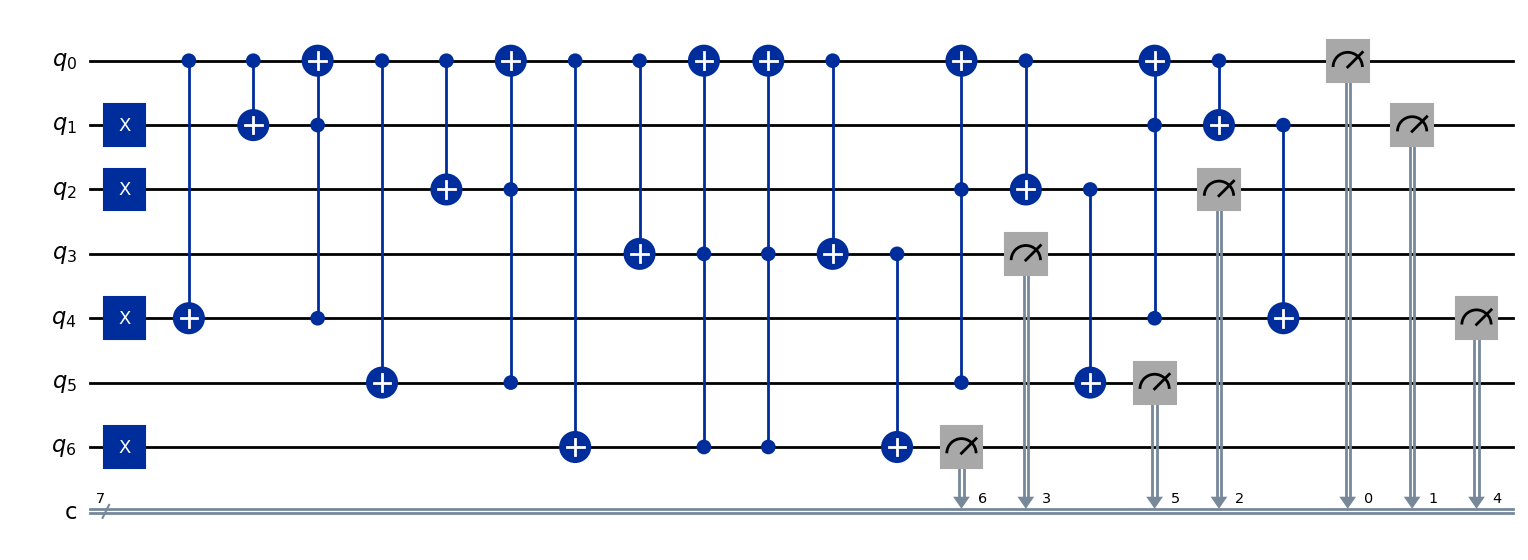

In [ ]:
def rca3(a_bits, b_bits, cin=0):
    """
    3-bit reversible ripple-carry adder 
    Uses 7 qubits total
    """
    q = QuantumRegister(7, "q")
    c = ClassicalRegister(7, "c")
    qc = QuantumCircuit(q, c)

    # Initialize inputs
    if cin:
        qc.x(q[0])
    for i, bit in enumerate(a_bits):     
        if bit:
            qc.x(q[1+i])
    for i, bit in enumerate(b_bits):     
        if bit:
            qc.x(q[4+i])

    
    qc.cx(q[0], q[4])
    qc.cx(q[0], q[1])
    qc.ccx(q[1], q[4], q[0])

    qc.cx(q[0], q[5])
    qc.cx(q[0], q[2])
    qc.ccx(q[2], q[5], q[0])

    # Stage 2: (a2,b2,c2) -> c3 in q0
    qc.cx(q[0], q[6])
    qc.cx(q[0], q[3])
    qc.ccx(q[3], q[6], q[0])


    qc.ccx(q[3], q[6], q[0])
    qc.cx(q[0], q[3])
    qc.cx(q[3], q[6])

    qc.ccx(q[2], q[5], q[0])
    qc.cx(q[0], q[2])
    qc.cx(q[2], q[5])

    qc.ccx(q[1], q[4], q[0])
    qc.cx(q[0], q[1])
    qc.cx(q[1], q[4])

    qc.measure(q, c)

    return qc

# Example test:
# A = a2 a1 a0 = 0 1 1  (3)
# B = b2 b1 b0 = 1 0 1  (5)
qc = rca3(a_bits=[1,1,0], b_bits=[1,0,1], cin=0)

display(qc.draw("mpl"))

### Simulating

In [ ]:
sim = Aer.get_backend("aer_simulator")
tqc = transpile(qc, sim)
res = sim.run(tqc, shots=1024).result()
counts_sim = res.get_counts()
counts_sim

{'0000110': 1024}

### Running On Real Qunatum Hardware same method as in Task 5

In [ ]:
service = QiskitRuntimeService(channel="ibm_quantum_platform")
backend = service.least_busy(simulator=False, operational=True)
print("Using backend:", backend.name)

pm = generate_preset_pass_manager(
    optimization_level=1,
    backend=backend,
    translation_method="translator"
)
tqc_hw = pm.run(qc)

sampler = SamplerV2(backend)
job = sampler.run([tqc_hw], shots=1024)
print("Job ID:", job.job_id())

result = job.result()
counts_hw = result[0].data.c.get_counts()
counts_hw

qiskit_runtime_service.__init__:WARNING:2026-02-28 21:06:03,138: Instance was not set at service instantiation. Free and trial plan instances will be prioritized. Based on the following filters: (tags: None, region: us-east, eu-de), and available plans: (open), the available account instances are: open-instance. If you need a specific instance set it explicitly either by using a saved account with a saved default instance or passing it in directly to QiskitRuntimeService().
qiskit_runtime_service.backends:WARNING:2026-02-28 21:06:05,332: Loading instance: open-instance, plan: open
qiskit_runtime_service.backends:WARNING:2026-02-28 21:06:10,245: Using instance: open-instance, plan: open


Using backend: ibm_torino
Job ID: d6hit5athhns73927f00


{'0000110': 354,
 '0100110': 32,
 '0000010': 32,
 '1100010': 12,
 '0110001': 37,
 '0100010': 14,
 '0011101': 2,
 '1110100': 7,
 '0001100': 1,
 '1111001': 15,
 '1010001': 8,
 '1000110': 41,
 '1101111': 2,
 '0110110': 5,
 '0000111': 38,
 '1000101': 10,
 '1110001': 16,
 '0000101': 54,
 '0110011': 1,
 '0011110': 4,
 '1001110': 22,
 '0101000': 2,
 '0100101': 7,
 '1100110': 7,
 '1000010': 7,
 '0001110': 33,
 '1000100': 1,
 '0001101': 4,
 '0010101': 31,
 '0001111': 2,
 '0000001': 2,
 '0110100': 2,
 '0000100': 12,
 '0110101': 4,
 '0111001': 12,
 '0010110': 17,
 '0010000': 3,
 '1100001': 3,
 '1100101': 1,
 '0011001': 3,
 '1011010': 2,
 '1100111': 2,
 '1110101': 9,
 '1111111': 2,
 '1101101': 1,
 '0101101': 1,
 '1000111': 6,
 '1101000': 1,
 '1110110': 12,
 '0010010': 5,
 '0101111': 2,
 '0010001': 9,
 '0001010': 1,
 '1001010': 4,
 '1111010': 3,
 '1100000': 3,
 '0000011': 3,
 '1000011': 2,
 '0010100': 8,
 '0100001': 6,
 '0110010': 3,
 '1010101': 6,
 '1101110': 2,
 '0111110': 1,
 '1011100': 1,
 '100

Vizualizing

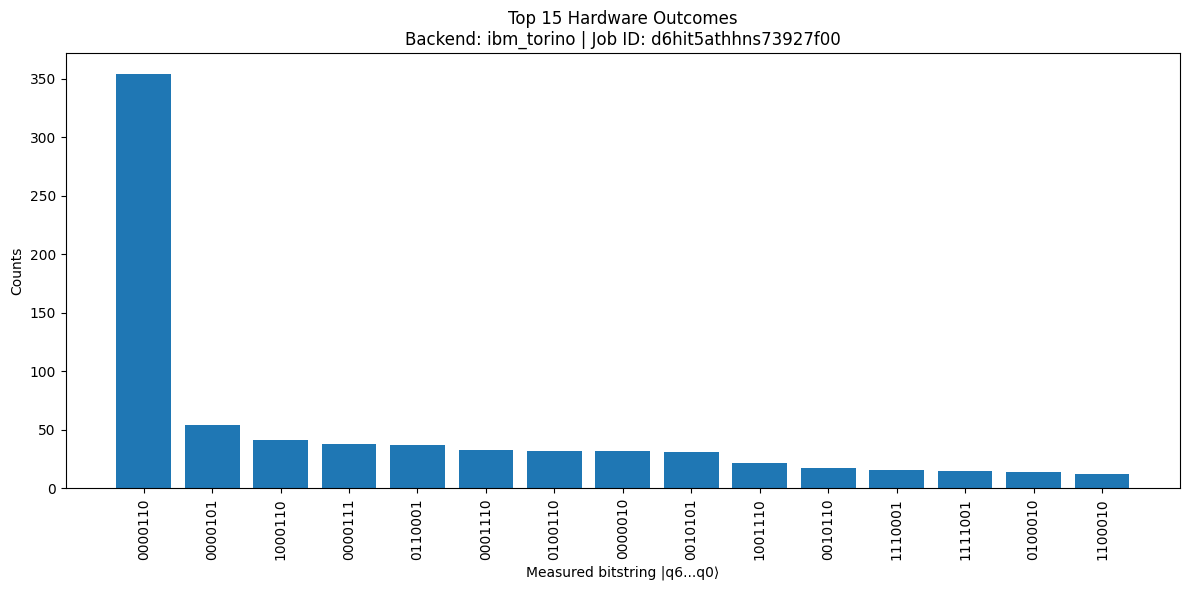

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter

top15 = dict(Counter(counts_hw).most_common(15))

labels = list(top15.keys())
values = list(top15.values())

plt.figure(figsize=(12,6))
plt.bar(labels, values)
plt.xticks(rotation=90)
plt.xlabel("Measured bitstring |q6...q0⟩")
plt.ylabel("Counts")
plt.title(f"Top 15 Hardware Outcomes\nBackend: {backend.name} | Job ID: {job.job_id()}")
plt.tight_layout()
plt.show()

As we noticed even though we don't have superposition in our circuit real quantum hardware have noise 

## Task 7

Using your implementation in the previous task, use the 3-bit ripple carry
adder to add two 3-bit numbers (e.g. A and B), where A and B are based
on your IDs. In particular, A is equal to mod 8 of the sum of the rightmost
two digits in your ID, while B is mod 8 of the sum of the following two
digits. For example, if your ID is 200325710 then A = 1+0 = 1 mod 8 =
1 and B = 7+5=11 mod 8 = 3. The circuit should calculates the binary
addition of 1 and 3 in binary.

I could just use the function in task 6 

Since my ID is 202515470 , A=7, B = 1, Binary A = 111, B = 001

In [ ]:
qc = rca3(a_bits=[1,1,1], b_bits=[1,0,0], cin=0)

sim = Aer.get_backend("aer_simulator")
tqc = transpile(qc, sim)
res = sim.run(tqc, shots=1024).result()
counts_sim = res.get_counts()
counts_sim

{'0001110': 1024}